<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-04-30 01:54:08--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 173.194.216.113, 173.194.216.100, 173.194.216.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-6k-docs.googleusercontent.com/docs/securesc/ic8lc895nepjeph5njnfi1l56io0uk3a/a55m1klf16ltl990smk2qfcldjnsmshf/1588211625000/11146100322577758036/10793489726569277179Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-04-30 01:54:08--  https://doc-04-6k-docs.googleusercontent.com/docs/securesc/ic8lc895nepjeph5njnfi1l56io0uk3a/a55m1klf16ltl990smk2qfcldjnsmshf/1588211625000/11146100322577758036/10793489726569277179Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-04-6k-docs.googleusercontent.com (doc-04-6k-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connectin

**Añadir carpeta**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import shutil
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
from joblib import dump,load
from main_functions import *
from google.colab import files
import matplotlib.pyplot as plt
from scipy.spatial import distance
from datetime import date, datetime
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin

**Cargar Bases de datos**

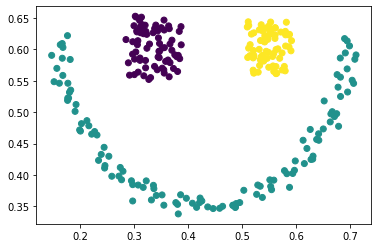

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Parte 1**

**Punto Fijo**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)
Rari_Fp=adjusted_rand_score(y_test,labels_pre_FP)


/content/PRI/main_functions.py:201: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:1.6071743965148926sg
Ari: 1.0 y accuracy: 1.0


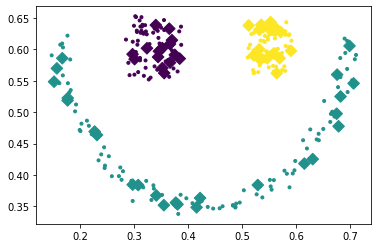

In [24]:
t = time.time()
p = PRI(lambda_=3, n_clusters=3, nn=3, sigma_initial=4)
p.fit(X_train, y_train)
labels_pre_FP = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_FP, marker='D',s=68)
Rari_FP=adjusted_rand_score(y_test,labels_pre_FP)
Racc_FP=accuracy_score(y_test,labels_pre_FP)
print('Ari: '+str(Rari_FP)+' y'+' accuracy: '+str(Racc_FP))


**SGD**

el tiempo requerido fue:1.0082659721374512sg
Ari: 0.9405619171290285 y accuracy: 0.9814814814814815


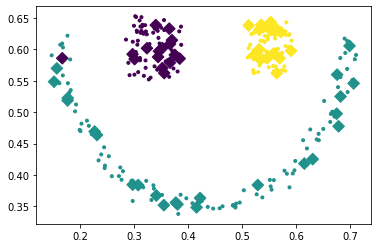

In [23]:
t = time.time()
p = MiniBatchPRI(lambda_=3, n_clusters=3, nn=3, sigma_initial=4)
p.fit(X_train, y_train)
labels_pre_SGD = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGD, marker='D',s=68)
Rari_SGD=adjusted_rand_score(y_test,labels_pre_SGD)
Racc_SGD=accuracy_score(y_test,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))

**Adam**

el tiempo requerido fue:1.208676815032959sg
Ari: 0.9405619171290285 y accuracy: 0.9814814814814815


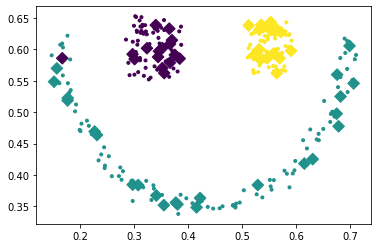

In [25]:
t = time.time()
p = MiniBatchPRI(lambda_=3, n_clusters=3, nn=3, sigma_initial=4,optimization='Adam')
p.fit(X_train, y_train)
labels_pre_SGDA = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDA, marker='D',s=68)
Rari_SGDA=adjusted_rand_score(y_test,labels_pre_SGDA)
Racc_SGDA=accuracy_score(y_test,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))

**Nadam**

el tiempo requerido fue:1.5518600940704346sg
Ari: 0.779691211401425 y accuracy: 0.9259259259259259


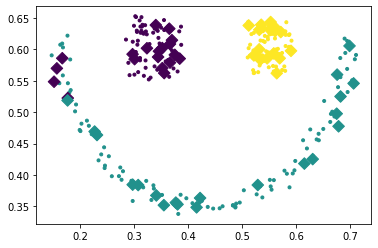

In [26]:
t = time.time()
p = MiniBatchPRI(lambda_=3, n_clusters=3, nn=3, sigma_initial=4,optimization='Nadam')
p.fit(X_train, y_train)
labels_pre_SGDN = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SGDN, marker='D',s=68)
Rari_SGDN=adjusted_rand_score(y_test,labels_pre_SGDN)
Racc_SGDN=accuracy_score(y_test,labels_pre_SGDN)
print('Ari: '+str(Rari_SGDN)+' y'+' accuracy: '+str(Racc_SGDN))

**KNN**

el tiempo requerido fue:0.06328225135803223sg
Ari: 0.3627377305046534 y accuracy: 0.7222222222222222


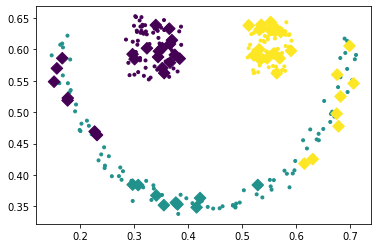

In [28]:
t = time.time()
p = Kmeans( n_clusters_=3)
p.fit(X_train, y_train)
labels_pre_Km= p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_Km, marker='D',s=68)
Rari_Km=adjusted_rand_score(y_test,labels_pre_Km)
Racc_Km=accuracy_score(y_test,labels_pre_Km)
print('Ari: '+str(Rari_Km)+' y'+' accuracy: '+str(Racc_Km))


**Spectral CLustering**

el tiempo requerido fue:0.06723451614379883sg
Ari: 1.0 y accuracy: 1.0


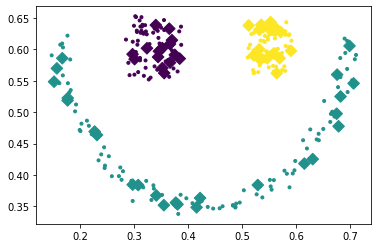

In [30]:
t = time.time()
p = SC(n_clusters_=3, gamma_=500, n_neighbors_=5, nn=3)
p.fit(X_train, y_train)
labels_pre_SC = p.predict(X_test)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_SC, marker='D',s=68)
Rari_SC=adjusted_rand_score(y_test,labels_pre_SC)
Racc_SC=accuracy_score(y_test,labels_pre_SC)
print('Ari: '+str(Rari_SC)+' y'+' accuracy: '+str(Racc_SC))


**Con ruido**

**Happy**

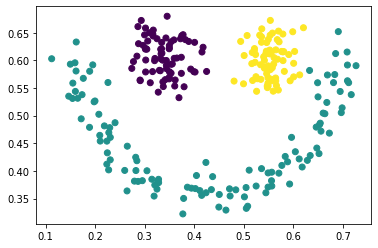

In [0]:
noise = np.random.normal(0,1,happy.shape)
noisy_happy=happy+noise*0.02
plt.scatter(noisy_happy[:,0],noisy_happy[:,1],c=labels_happy)

**Moons**

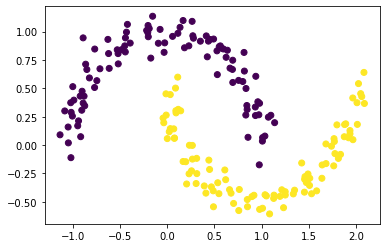

In [31]:
from sklearn import  datasets
noisy_moons,labels_moons = datasets.make_moons(n_samples=200, noise=.085)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=labels_moons)

**Resultados**

**Happy**

In [0]:
n_clusters=3
steps =[[('rep',SC())],
        [('rep',Kmeans())], 
        [('rep', PRI( reduction_ = True,method='FP'))], 
         [('rep', MiniBatchPRI( reduction_ = True))], 
         [('rep', MiniBatchPRI( reduction_ = True,optimization='Adam'))], 
          [('rep',  MiniBatchPRI( reduction_ = True,optimization='Nadam'))]] 
   
parameters =[{'rep__gamma_':[10,100,200,500,1000],'rep__n_neighbors_':[5,10,15],'rep__nn_':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]}]

In [0]:
#valildacion cruzada anidada
for i in range(len(steps)):
  meth_name = ['sc', 'Knn', 'FP','SGD','SGDA','SGDN']
  name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  ari=acc
  Nc = len(np.unique(labels_happy))
  cmc = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  best_estimators= []#mejor metodo por iteracion
  best_parameters= []#mejor metodo por iteracion

  for j in range(Niter):
          print('it %d/%d'%(j+1,Niter))
          ## Accuracy
          X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
          grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_parameters.append(grid_search.best_params_)
          
          #guardar acierto
          acc[j] = 100*accuracy_score(y_test,y_pred)
          ari[j]=100*adjusted_rand_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search.best_params_)
          print('acc:',acc[j])
          print('confusionmatrix \n',cmc[j])
          savedata = {
              'ari':ari,
              'acc':acc,
              'confusionmatrix':cmc,
              'best_models':best_estimators,
              'best_parameters':best_parameters,
                } 
          dump(savedata,name)

it 1/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 1/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 2/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 222 out of 225 | elapsed:    7.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 2/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 3/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 3/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 4/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 4/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 5/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 5/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 6/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 6/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 7/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


it 7/10
{'rep__gamma_': 500, 'rep__n_clusters_': 3, 'rep__n_neighbors_': 5, 'rep__nn_': 3}
acc: 100.0
confusionmatrix 
 [[100.   0.   0.]
 [  0. 100.   0.]
 [  0.   0. 100.]]
it 8/10
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.8s


**Moons**

In [54]:
usters=2
steps =[[('rep',SC())],
        [('rep',Kmeans())], 
        [('rep', PRI( reduction_ = True,method='FP'))], 
         [('rep', MiniBatchPRI( reduction_ = True))], 
         [('rep', MiniBatchPRI( reduction_ = True,optimization='Adam'))], 
          [('rep',  MiniBatchPRI( reduction_ = True,optimization='Nadam'))]] 
   
parameters =[{'rep__gamma_':[10,100,200,500,1000],'rep__n_neighbors_':[5,10,15],'rep__nn_':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__nn':[3,5,9],'rep__n_clusters_':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]},
             {'rep__lambda_':[5, 10, 15, 30, 50],
             'rep__sigma_initial':[4,10,15,25,40],
             'rep__nn':[3,5,9],'rep__n_clusters':[n_clusters]}]

TypeError: ignored

In [0]:
#valildacion cruzada anidada
for i in range(len(steps)):
  meth_name = ['sc', 'Knn', 'FP','SGD','SGDA','SGDN']
  name='/content/PRI/happy' + str(meth_name[i]) + '.joblib'
  Niter = 10 #numero particiones
  acc =np.zeros(Niter)#arreglo para guardar acierto
  ari=acc
  Nc = len(np.unique(labels_happy))
  cmc = np.zeros((Niter,Nc,Nc))#arreglo para guarda matrices de confusion
  best_estimators= []#mejor metodo por iteracion
  best_parameters= []#mejor metodo por iteracion

  for j in range(Niter):
          print('it %d/%d'%(j+1,Niter))
          ## Accuracy
          X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
          grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_parameters.append(grid_search.best_params_)
          
          #guardar acierto
          acc[j] = 100*accuracy_score(y_test,y_pred)
          ari[j]=100*adjusted_rand_score(y_test,y_pred)
          #estimar matriz de confusion
          cm = confusion_matrix(y_test, y_pred)
          cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cmc[j] = cm
          print('it %d/%d'%(j+1,Niter))
          print(grid_search.best_params_)
          print('acc:',acc[j])
          print('confusionmatrix \n',cmc[j])
          savedata = {
              'ari':ari,
              'acc':acc,
              'confusionmatrix':cmc,
              'best_models':best_estimators,
              'best_parameters':best_parameters,
                } 
          dump(savedata,name)

it 1/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.6min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished


it 3/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.1min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:   59.5s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.5min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  55 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.0min finished


it 7/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.0min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.6min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  2.0min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  1.9min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__gamma': 100, 'rep__n_clusters': 2, 'rep__n_neighbors': 5}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 1/10
{'rep__n_clusters': 2}
acc_ars: 23.107255520504726
confusionmatrix_ars 
 [[85. 15.]
 [35. 65.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10
{'rep__n_clusters': 2}
acc: 82.5
confusionmatrix 
 [[90. 10.]
 [25. 75.]]
it 2/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10
{'rep__n_clusters': 2}
acc_ars: 40.73416222616933
confusionmatrix_ars 
 [[80. 20.]
 [15. 85.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 2/10
{'rep__n_clusters': 2}
acc: 80.0
confusionmatrix 
 [[75. 25.]
 [15. 85.]]
it 3/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10
{'rep__n_clusters': 2}
acc_ars: 34.384858044164034
confusionmatrix_ars 
 [[90. 10.]
 [30. 70.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 3/10
{'rep__n_clusters': 2}
acc: 70.0
confusionmatrix 
 [[70. 30.]
 [30. 70.]]
it 4/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 4/10
{'rep__n_clusters': 2}
acc_ars: 23.04656669297554
confusionmatrix_ars 
 [[70. 30.]
 [20. 80.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10
{'rep__n_clusters': 2}
acc: 77.5
confusionmatrix 
 [[80. 20.]
 [25. 75.]]
it 5/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10
{'rep__n_clusters': 2}
acc_ars: 40.73416222616933
confusionmatrix_ars 
 [[80. 20.]
 [15. 85.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10
{'rep__n_clusters': 2}
acc: 70.0
confusionmatrix 
 [[80. 20.]
 [40. 60.]]
it 6/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10
{'rep__n_clusters': 2}
acc_ars: 18.156700217090982
confusionmatrix_ars 
 [[70. 30.]
 [25. 75.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 6/10
{'rep__n_clusters': 2}
acc: 80.0
confusionmatrix 
 [[75. 25.]
 [15. 85.]]
it 7/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10
{'rep__n_clusters': 2}
acc_ars: 28.419182948490228
confusionmatrix_ars 
 [[75. 25.]
 [20. 80.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 7/10
{'rep__n_clusters': 2}
acc: 67.5
confusionmatrix 
 [[65. 35.]
 [30. 70.]]
it 8/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10
{'rep__n_clusters': 2}
acc_ars: 28.53201970443349
confusionmatrix_ars 
 [[90. 10.]
 [35. 65.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__n_clusters': 2}
acc: 77.5
confusionmatrix 
 [[75. 25.]
 [20. 80.]]
it 9/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10
{'rep__n_clusters': 2}
acc_ars: 28.419182948490228
confusionmatrix_ars 
 [[75. 25.]
 [20. 80.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


it 9/10
{'rep__n_clusters': 2}
acc: 70.0
confusionmatrix 
 [[70. 30.]
 [30. 70.]]
it 10/10
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10
{'rep__n_clusters': 2}
acc_ars: 40.73416222616933
confusionmatrix_ars 
 [[80. 20.]
 [15. 85.]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10
{'rep__n_clusters': 2}
acc: 80.0
confusionmatrix 
 [[75. 25.]
 [15. 85.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.3min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 71.53659017686896
confusionmatrix_ars 
 [[100.   0.]
 [ 15.  85.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.7min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   30.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.7min finished
/content/PRI/main_functions.py:199: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   17.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.6min finished


it 2/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 40}
acc: 92.5
confusionmatrix 
 [[100.   0.]
 [ 15.  85.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 15}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc: 97.5
confusionmatrix 
 [[100.   0.]
 [  5.  95.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 10}
acc_ars: 89.99407933688573
confusionmatrix_ars 
 [[100.   0.]
 [  5.  95.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.9min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 5/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.0min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.9min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 10}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.1min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   25.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 3, 'rep__sigma_initial': 10}
acc: 97.5
confusionmatrix 
 [[100.   0.]
 [  5.  95.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 63.09148264984227
confusionmatrix_ars 
 [[100.   0.]
 [ 20.  80.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   26.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.8min finished
/content/PRI/main_functions.py:199: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   18.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.1min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.5min finished
/content/PRI/main_functions.py:199: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


it 9/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   21.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  3.3min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.8min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 71.52161042036708
confusionmatrix_ars 
 [[95.  5.]
 [10. 90.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 1/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 92.5
confusionmatrix 
 [[100.   0.]
 [ 15.  85.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 2/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 2/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 90.0
confusionmatrix 
 [[ 80.  20.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 3/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 3/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 92.5
confusionmatrix 
 [[ 85.  15.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 4/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 4/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 90.0
confusionmatrix 
 [[90. 10.]
 [10. 90.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 63.09148264984227
confusionmatrix_ars 
 [[ 80.  20.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.1s
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 5/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.3s
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 6/10
{'rep__lambda_': 10, 'rep__nn': 3, 'rep__sigma_initial': 10}
acc_ars: 71.52161042036708
confusionmatrix_ars 
 [[90. 10.]
 [ 5. 95.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 7/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 55.172413793103445
confusionmatrix_ars 
 [[ 75.  25.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 7/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 8/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 55.172413793103445
confusionmatrix_ars 
 [[100.   0.]
 [ 25.  75.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.6s
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  1.9min finished


it 9/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc_ars: 71.52161042036708
confusionmatrix_ars 
 [[90. 10.]
 [ 5. 95.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 9/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 95.0
confusionmatrix 
 [[ 90.  10.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 10/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}
acc: 95.0
confusionmatrix 
 [[ 90.  10.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   15.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 95.0
confusionmatrix 
 [[ 90.  10.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 89.99407933688573
confusionmatrix_ars 
 [[ 95.   5.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 2/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 3/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 3/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc_ars: 80.50513022888714
confusionmatrix_ars 
 [[ 90.  10.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 3/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 4/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 4/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 80.50513022888714
confusionmatrix_ars 
 [[100.   0.]
 [ 10.  90.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 4/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 4}
acc: 87.5
confusionmatrix 
 [[ 75.  25.]
 [  0. 100.]]
it 5/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 5/10
{'rep__lambda_': 50, 'rep__nn': 5, 'rep__sigma_initial': 25}
acc_ars: 71.53659017686896
confusionmatrix_ars 
 [[ 85.  15.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 5/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 92.5
confusionmatrix 
 [[ 85.  15.]
 [  0. 100.]]
it 6/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 6/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc_ars: 71.53659017686896
confusionmatrix_ars 
 [[ 85.  15.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 6/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 100.0
confusionmatrix 
 [[100.   0.]
 [  0. 100.]]
it 7/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 7/10
{'rep__lambda_': 30, 'rep__nn': 5, 'rep__sigma_initial': 4}
acc_ars: 80.50513022888714
confusionmatrix_ars 
 [[ 90.  10.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 7/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 8/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 8/10
{'rep__lambda_': 10, 'rep__nn': 5, 'rep__sigma_initial': 40}
acc_ars: 63.09148264984227
confusionmatrix_ars 
 [[100.   0.]
 [ 20.  80.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 8/10
{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc: 90.0
confusionmatrix 
 [[100.   0.]
 [ 20.  80.]]
it 9/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 9/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc_ars: 89.99407933688573
confusionmatrix_ars 
 [[ 95.   5.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.0min finished


it 9/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 85.0
confusionmatrix 
 [[ 70.  30.]
 [  0. 100.]]
it 10/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 10/10
{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 100.0
confusionmatrix_ars 
 [[100.   0.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 10/10
{'rep__lambda_': 15, 'rep__nn': 9, 'rep__sigma_initial': 15}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 1/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}
acc_ars: 47.781569965870304
confusionmatrix_ars 
 [[ 70.  30.]
 [  0. 100.]]
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 375 out of 375 | elapsed:  2.1min finished


it 1/10
{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 25}
acc: 97.5
confusionmatrix 
 [[ 95.   5.]
 [  0. 100.]]
it 2/10
Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   13.7s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.1min


**Guardar resultados**

In [0]:
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__results'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')

**Mostrar resultados**

**Happy**

**Accuracy**

In [0]:
#cargar resultados y graficar promedios por iteraciones
## SC
SC = load('/content/PRI/happysc.joblib')
acc_sc = SC['acc']
cmc_sc = SC['confusionmatrix']
best_estimators_sc = SC['best_models']
best_parameters_sc = SC['best_parameters']
## Kmean
Knn = load('/content/PRI/happyKnn.joblib')
acc_knn = Knn['acc']
cmc_knn = Knn['confusionmatrix']
best_estimators_knn = Knn['best_models']
best_parameters_knn = Knn['best_parameters']
## FP
FP = load('/content/PRI/happyFP.joblib')
acc_fp = FP['acc']
cmc_fp = FP['confusionmatrix']
best_estimators_fp = FP['best_models']
best_parameters_fp = FP['best_parameters']
## Mini lotes
SGD = load('/content/PRI/happySGD.joblib')
acc_sgd = SGD['acc']
cmc_sgd = SGD['confusionmatrix']
best_estimators_sgd = SGD['best_models']
best_parameters_sgd = SGD['best_parameters']
## Adam
SGDA = load('/content/PRI/happySGDA.joblib')
acc_sgda = SGDA['acc']
cmc_sgda = SGDA['confusionmatrix']
best_estimators_sgda = SGDA['best_models']
best_parameters_sgda = SGDA['best_parameters']
## Nadam
SGDN = load('/content/PRI/happySGDN.joblib')
acc_sgdn = SGDN['acc']
cmc_sgdn = SGDN['confusionmatrix']
best_estimators_sgdn = SGDN['best_models']
best_parameters_sgdn = SGDN['best_parameters']

**Accuracy**

In [35]:
np.mean(cmc_sc,axis=0)

array([[  0., 100.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])

{'rep__n_clusters': 3}


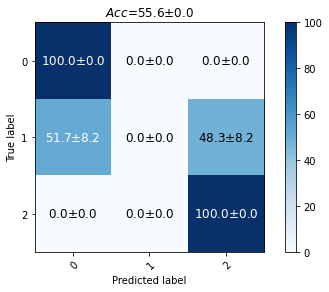

In [37]:
plot_confusion_matrix_MS(np.mean(cmc_knn,axis=0), np.std(cmc_knn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_knn),'.1f') +'$\pm$'+ format(np.std(acc_knn),'.1f'))
print(best_parameters_knn[0])

{'rep__lambda_': 50, 'rep__nn': 9, 'rep__sigma_initial': 15}


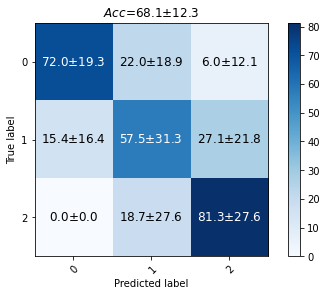

In [38]:

plot_confusion_matrix_MS(np.mean(cmc_fp,axis=0), np.std(cmc_fp,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_fp),'.1f') +'$\pm$'+ format(np.std(acc_fp),'.1f'))
print(best_parameters_fp[0])

{'rep__lambda_': 30, 'rep__nn': 9, 'rep__sigma_initial': 10}


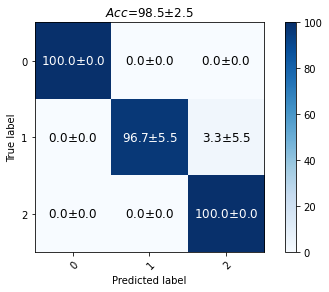

In [40]:
plot_confusion_matrix_MS(np.mean(cmc_sgd,axis=0), np.std(cmc_sgd,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgd),'.1f') +'$\pm$'+ format(np.std(acc_sgd),'.1f'))
print(best_parameters_sgd[0])

{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 4}


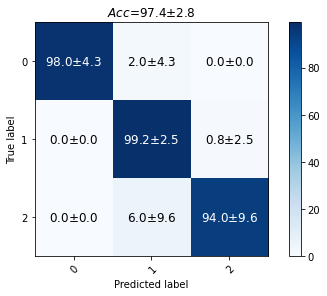

In [42]:
plot_confusion_matrix_MS(np.mean(cmc_sgda,axis=0), np.std(cmc_sgda,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgda),'.1f') +'$\pm$'+ format(np.std(acc_sgda),'.1f'))
print(best_parameters_sgda[0])

{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 40}


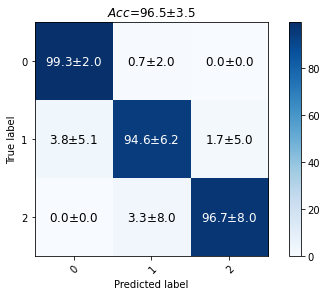

In [43]:
plot_confusion_matrix_MS(np.mean(cmc_sgdn,axis=0), np.std(cmc_sgdn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgdn),'.1f') +'$\pm$'+ format(np.std(acc_sgdn),'.1f'))
print(best_parameters_sgdn[0])

**Moons**

**Accuracy**

In [0]:
#cargar resultados y graficar promedios por iteraciones
## SC
SC = load('/content/PRI/moonssc.joblib')
acc_sc = SC['acc']
cmc_sc = SC['confusionmatrix']
best_estimators_sc = SC['best_models']
best_parameters_sc = SC['best_parameters']
## Kmean
Knn = load('/content/PRI/moonsKnn.joblib')
acc_knn = Knn['acc']
cmc_knn = Knn['confusionmatrix']
best_estimators_knn = Knn['best_models']
best_parameters_knn = Knn['best_parameters']
## FP
FP = load('/content/PRI/moonsFP.joblib')
acc_fp = FP['acc']
cmc_fp = FP['confusionmatrix']
best_estimators_fp = FP['best_models']
best_parameters_fp = FP['best_parameters']
## Mini lotes
SGD = load('/content/PRI/moonsSGD.joblib')
acc_sgd = SGD['acc']
cmc_sgd = SGD['confusionmatrix']
best_estimators_sgd = SGD['best_models']
best_parameters_sgd = SGD['best_parameters']
## Adam
SGDA = load('/content/PRI/moonsSGDA.joblib')
acc_sgda = SGDA['acc']
cmc_sgda = SGDA['confusionmatrix']
best_estimators_sgda = SGDA['best_models']
best_parameters_sgda = SGDA['best_parameters']
## Nadam
SGDN = load('/content/PRI/moonsSGDN.joblib')
acc_sgdn = SGDN['acc']
cmc_sgdn = SGDN['confusionmatrix']
best_estimators_sgdn = SGDN['best_models']
best_parameters_sgdn = SGDN['best_parameters']

In [50]:
np.mean(cmc_sc,axis=0)

array([[100.,   0.],
       [  0., 100.]])

{'rep__n_clusters': 2}


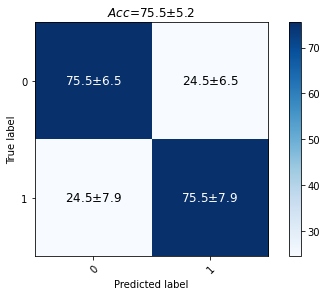

In [45]:
plot_confusion_matrix_MS(np.mean(cmc_knn,axis=0), np.std(cmc_knn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_knn),'.1f') +'$\pm$'+ format(np.std(acc_knn),'.1f'))
print(best_parameters_knn[0])

{'rep__lambda_': 5, 'rep__nn': 5, 'rep__sigma_initial': 25}


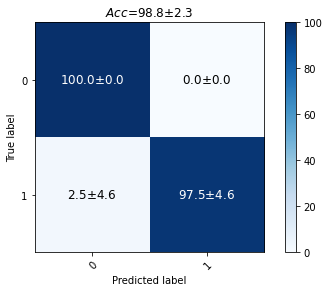

In [46]:
plot_confusion_matrix_MS(np.mean(cmc_fp,axis=0), np.std(cmc_fp,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_fp),'.1f') +'$\pm$'+ format(np.std(acc_fp),'.1f'))
print(best_parameters_fp[0])

{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}


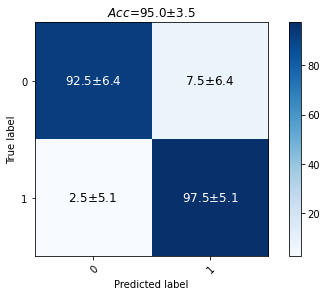

In [47]:
plot_confusion_matrix_MS(np.mean(cmc_sgd,axis=0), np.std(cmc_sgd,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgd),'.1f') +'$\pm$'+ format(np.std(acc_sgd),'.1f'))
print(best_parameters_sgd[0])

{'rep__lambda_': 5, 'rep__nn': 9, 'rep__sigma_initial': 4}


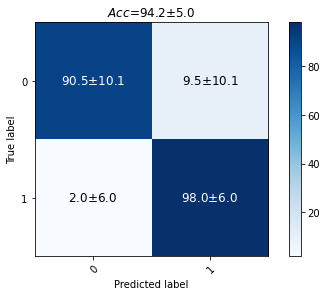

In [48]:
plot_confusion_matrix_MS(np.mean(cmc_sgda,axis=0), np.std(cmc_sgda,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgda),'.1f') +'$\pm$'+ format(np.std(acc_sgda),'.1f'))
print(best_parameters_sgda[0])

{'rep__lambda_': 10, 'rep__nn': 9, 'rep__sigma_initial': 10}


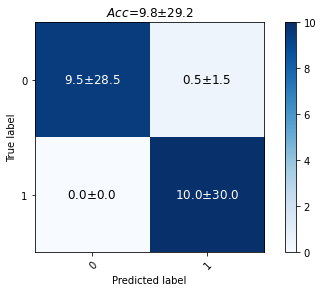

In [49]:
plot_confusion_matrix_MS(np.mean(cmc_sgdn,axis=0), np.std(cmc_sgdn,axis=0), np.unique(labels_happy))
plt.title('${Acc}$='+ format(np.mean(acc_sgdn),'.1f') +'$\pm$'+ format(np.std(acc_sgdn),'.1f'))
print(best_parameters_sgdn[0])

**Parte 2**

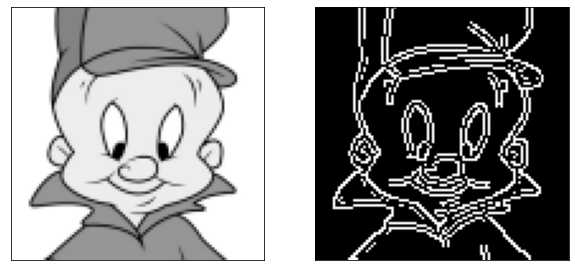

In [0]:
img = cv2.imread('/content/PRI/image.PNG', 0)
edges = cv2.Canny(img, 100, 255)
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
indices=np.asarray(indices).T
indices=np.flip(indices)
indices[:,1]=abs(indices[:,1]-np.amax(indices))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

**Punto Fijo**

el tiempo requerido fue:69.46774697303772sg


/content/PRI/main_functions.py:198: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


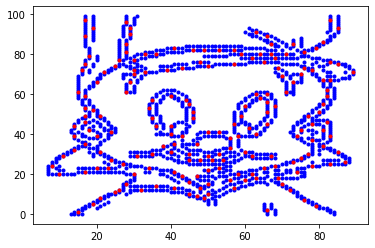

In [0]:
# ss= reducir el tamaño de muestras originales N veces 
# PC= criterio de paciencia
t = time.time()
p = PRI(n_groups=3, lambda_=15, sigma_initial=2, method='FP',
        reduction_ = False, max_iter=600,PC=400,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**SGD por mini lotes**

el tiempo requerido fue:1.475994348526001sg


/content/PRI/main_functions.py:479: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


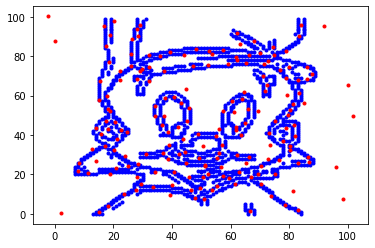

In [0]:

# PC= criterio de paciencia
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=40, method='SGD',
                 reduction_ = False,PC=500,lr=1.1,decay=0.00001,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**Adam**

/content/PRI/main_functions.py:479: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:1.4350457191467285sg


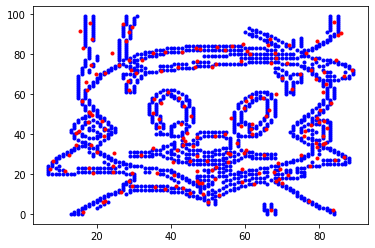

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=40, method='SGD', optimization='Adam',
                 reduction_ = False, PC=500,lr=0.2, decay=0.00001,ss=8)
p.fit(indices)

print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')


**NAdam**

el tiempo requerido fue:1.4678702354431152sg


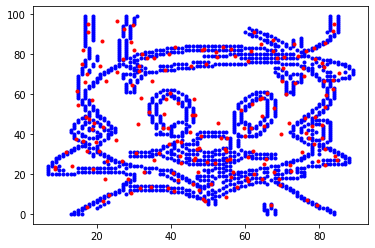

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=18, sigma_initial=50, method='SGD', optimization='Nadam',
                 reduction_ = False, PC=500,lr=0.1, decay=0.00001,ss=8)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
plt.plot(indices[:,0],indices[:,1],'b.')
plt.plot(p.cluster_centers_[:,0],p.cluster_centers_[:,1],'r.')

**Guardar resultados**

In [0]:

import shutil
from joblib import dump, load
from datetime import date, datetime
save={'i':indices}
dump(save,'/content/PRI/DB2.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'indices'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')